In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
train= pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# STEP1:Remove duplicates from the dataset.

In [4]:
Duplicate_Rows=train[train.duplicated()]

In [5]:
Duplicate_Rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


No duplicate data

# Step 2: Handle missing values by imputing or removing them.

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

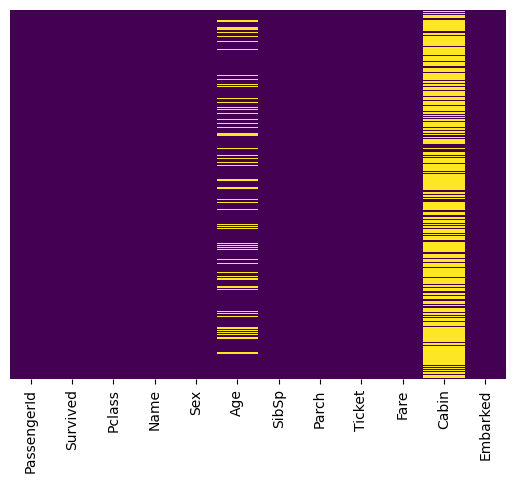

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

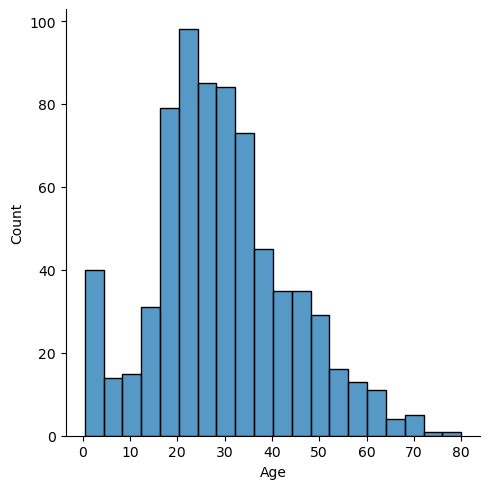

In [8]:
#Applying Imputation on Ages factor
sns.displot(train['Age'].dropna())

<Axes: xlabel='Pclass', ylabel='Age'>

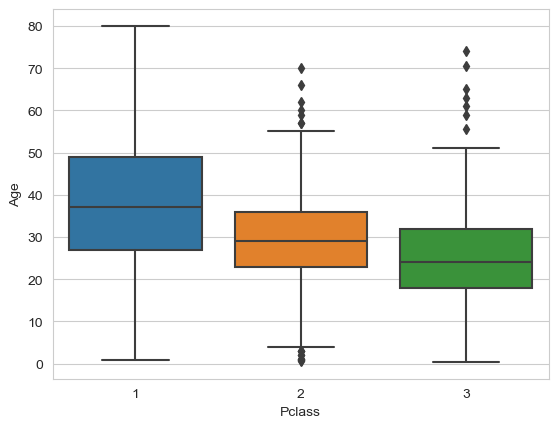

In [9]:
sns.set_style('whitegrid')
sns.boxplot(x='Pclass',y='Age' ,data=train)

In [10]:
 def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 23
    else:
        return Age

In [11]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)


<Axes: >

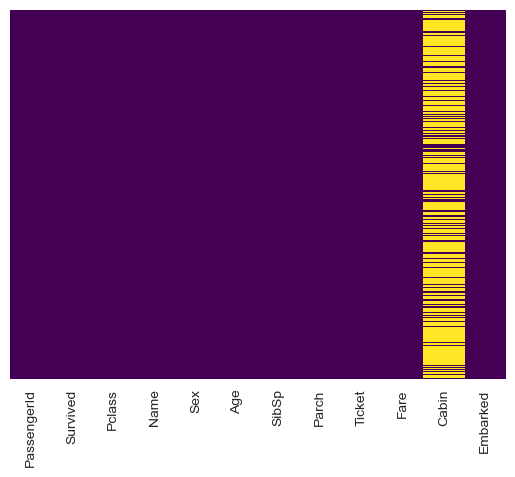

In [12]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
train.drop('Cabin',axis=1,inplace=True)

<Axes: >

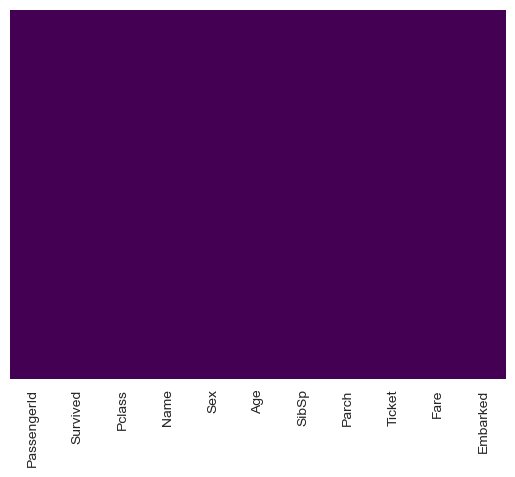

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis' )

In [15]:
#Our missing data has been handeld


# Step 3: Check and handle outliers in the data.

In [16]:
#In order to check outliers we will use Inter Quantile Range(IQR)

<Axes: >

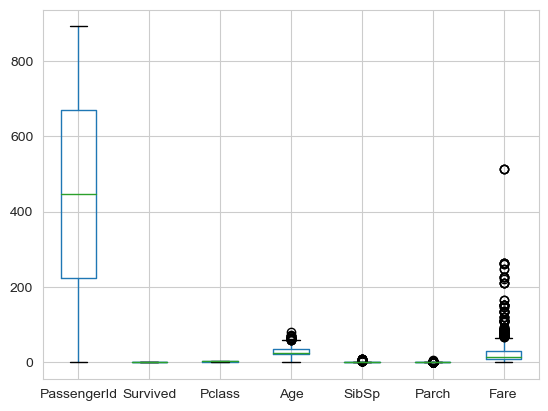

In [17]:
train.boxplot()

In [18]:
Q1=train['Age'].quantile(0.25)
Q3=train['Age'].quantile(0.75)
IQR=Q3-Q1
Lower_Bond=Q1-(1.5*IQR)
Upper_Bond=Q3+(1.5*IQR)
outlier=train[(train['Age']<Lower_Bond)|(train['Age']>Upper_Bond)]
train.dropna(inplace=True)

In [19]:
outlier


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,C


In [20]:
Q1=train['Fare'].quantile(0.25)
Q3=train['Fare'].quantile(0.75)
IQR=Q3-Q1
Lower_Bond=Q1-(1.5*IQR)
Upper_Bond=Q3+(1.5*IQR)
outlier=train[(train['Fare']<Lower_Bond)|(train['Fare']>Upper_Bond)]
train.dropna(inplace=True)

In [21]:
outlier


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,38.0,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,23.0,8,2,CA. 2343,69.5500,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,38.0,1,0,17453,89.1042,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,23.0,8,2,CA. 2343,69.5500,S


# Step 4: Normalize or standardize numerical features.

In [22]:
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

min_max_scaler = MinMaxScaler()
train[numerical_features] = min_max_scaler.fit_transform(train[numerical_features])


standard_scaler = StandardScaler()
train[numerical_features] = standard_scaler.fit_transform(train[numerical_features])

In [24]:
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.519303,0.431350,-0.474326,A/5 21171,-0.500240,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.684864,0.431350,-0.474326,PC 17599,0.788947,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.218261,-0.475199,-0.474326,STON/O2. 3101282,-0.486650,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.459082,0.431350,-0.474326,113803,0.422861,S
4,5,0,3,"Allen, Mr. William Henry",male,0.459082,-0.475199,-0.474326,373450,-0.484133,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,-0.143001,-0.475199,-0.474326,211536,-0.384475,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.745084,-0.475199,-0.474326,112053,-0.042213,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.444042,0.431350,2.006119,W./C. 6607,-0.174084,S
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.218261,-0.475199,-0.474326,111369,-0.042213,C


# Step 5: Encode categorical variables.

In [25]:
train.drop('Name',axis=1,inplace=True)

In [26]:
train.drop('Ticket',axis=1,inplace=True)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,-0.519303,0.431350,-0.474326,-0.500240,S
1,2,1,1,female,0.684864,0.431350,-0.474326,0.788947,C
2,3,1,3,female,-0.218261,-0.475199,-0.474326,-0.486650,S
3,4,1,1,female,0.459082,0.431350,-0.474326,0.422861,S
4,5,0,3,male,0.459082,-0.475199,-0.474326,-0.484133,S


In [28]:
from sklearn.preprocessing import LabelEncoder 
cols=['Sex','Embarked']
Le=LabelEncoder()
for col in cols:
    train[col]=Le.fit_transform(train[col])

In [29]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,-0.519303,0.431350,-0.474326,-0.500240,2
1,2,1,1,0,0.684864,0.431350,-0.474326,0.788947,0
2,3,1,3,0,-0.218261,-0.475199,-0.474326,-0.486650,2
3,4,1,1,0,0.459082,0.431350,-0.474326,0.422861,2
4,5,0,3,1,0.459082,-0.475199,-0.474326,-0.484133,2


In [30]:

# Encode categorical variables (if any)
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])

# Split the data into features (X) and target variable (y)
X = train.drop('Survived', axis=1)
y = train['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.14646788999915136
R^2 Score: 0.3829692026681144


In [33]:
# Split the data into features (X) and target variable (y)
X = train.drop('Survived', axis=1)
y = train['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_acc = accuracy_score(y_test, [round(pred) for pred in linear_pred])

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)

# Random Forest
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_acc = accuracy_score(y_test, forest_pred)

# Evaluate models
print(f'Linear Regression Accuracy: {linear_acc}')
print(f'Decision Tree Accuracy: {tree_acc}')
print(f'Random Forest Accuracy: {forest_acc}')

Linear Regression Accuracy: 0.797752808988764
Decision Tree Accuracy: 0.7303370786516854
Random Forest Accuracy: 0.797752808988764


# both Linear Regression and Random Forest models have similar accuracy on the test set, and they outperform the Decision Tree model.

# suggestion
Feature Engineering:
Hyperparameter Tuning:
Model-Specific Strategies: